# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random

/Users/zhenyadubnova/opt/anaconda3/envs/iad/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler_target = StandardScaler()
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [8]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train_scaled)
ridge_pred = ridge.predict(X_test_scaled)
ridge_pred2 = scaler_target.inverse_transform(ridge_pred)
print('RMSE на отмасштабированных данных: ', mse(ridge_pred, y_test_scaled, squared=False))
print('RMSE на отмасштабированных данных после возвращения предсказаний в обычную шкалу: ', mse(ridge_pred2, y_test, squared=False))

RMSE на отмасштабированных данных:  0.8693211767066854
RMSE на отмасштабированных данных после возвращения предсказаний в обычную шкалу:  9.510160820470437


In [9]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('RMSE на неотмасштабированных данных: ', mse(y_pred, y_test, squared=False))

RMSE на неотмасштабированных данных:  9.510160711373397


Ошибка на отмасштабированных и неотмасштабированных данных отличается на 10^(-7), что конечно оч мало)

In [10]:
print('RMSE на неотмасштабированных данных')
for coef in [0.1, 0.5, 1, 2, 5]:
    ridge = Ridge(coef)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f'alpha = {coef}: ', mse(y_pred, y_test, squared=False))

RMSE на неотмасштабированных данных
alpha = 0.1:  9.510160707877098
alpha = 0.5:  9.510160709431005
alpha = 1:  9.510160711373397
alpha = 2:  9.510160715258205
alpha = 5:  9.510160726912835


### константный прогноз ##

#### Если взять среднее значение по таргету тренировочной выборки и давать его в качестве предсказания

In [11]:
pred_len = len(y_test)
train_mean = y_train.mean()
prediction = train_mean*torch.ones(pred_len)
mse(prediction, y_test, squared=False)

10.85246376881908

#### Если взять среднее по таргету тестовой выборки и выдавать в качестве предсказания его (просто ради интереса, так то мы конечно не можем брать среднее по таргету из теста, потому что у нас как будто бы нет этих значений) 
#### Видим, что почти незаметная разница в ошибке, если брать константным предсказанием среднее по трейну или по тесту 

In [25]:
test_mean = y_test.mean()
prediction = test_mean*torch.ones(pred_len)
mse(prediction, y_test, squared=False)

10.851909820761223

Или если выдавать в качестве константного прогноза лучший целый вариант из всех 90 лет 

In [13]:
constant_pred_rmse = []
for year in range(1922, 2012):
    prediction = year*torch.ones(pred_len)
    constant_pred_rmse.append(mse(prediction, y_test, squared=False))
min(constant_pred_rmse)

10.863228020678134

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [14]:
from tqdm.auto import tqdm
import wandb

In [15]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [16]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float),  torch.tensor(self.y[idx], dtype=torch.float)

In [17]:
# взято из https://gist.github.com/jamesr2323/33c67ba5ac29880171b63d2c7f1acdc5
# class RMSELoss(torch.nn.Module):
#     def __init__(self):
#         super(RMSELoss,self).__init__()

#     def forward(self,x,y,return_dict=False):
#         criterion = nn.MSELoss()
#         eps = 1e-6
#         loss = torch.sqrt(criterion(x, y) + eps)
#         return loss

In [18]:
def train(model, optimizer, criterion, train_loader, test_loader, name, n_epochs=10):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    for epoch in range(n_epochs):
        # тренировка
        model.train()
        
        for x_train, y_train_part in tqdm(train_loader):
            y_pred = model(x_train)
            eps = 1e-6
            loss = torch.sqrt(criterion(y_pred, y_train_part) + eps)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # валидация
        model.train(mode=False)
        train_rmses = []
        test_rmses = []
        with torch.no_grad():
            y_train_pred = test(model, criterion, train_loader)
            rmse_train = mse(y_train, y_train_pred, squared=False)
            train_rmses.append(rmse_train)
            y_test_pred = test(model, criterion, test_loader)
            rmse = mse(y_test, y_test_pred, squared=False)
            test_rmses.append(rmse)
        print(f"Epoch: {epoch}, train loss: {rmse_train}, test loss: {rmse}")
        wandb.log({f"TEST LOSS {name}": rmse})
        wandb.log({f"TRAIN LOSS {name}": rmse_train})

In [19]:
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    predicts = scaler_target.inverse_transform(model(test_loader.dataset[:][0]).detach().numpy())
    return predicts

# Лучшая модель

In [20]:
wandb.login()
wandb.init(project="hw1_music", resume=True)

wandb: Currently logged in as: dubnova. Use `wandb login --relogin` to force relogin


In [21]:
set_random_seed(13)

train_set = Dataset(X_train_scaled, y_train_scaled)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=500)

test_set = Dataset(X_test_scaled, y_test_scaled)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64)


model = nn.Sequential(
        nn.Linear(90, 360),
        nn.LeakyReLU(),
        nn.BatchNorm1d(360),
        nn.Dropout(0.3),

        
        nn.Linear(360, 180),
        nn.LeakyReLU(),
        nn.BatchNorm1d(180),
        nn.Dropout(0.3),


        nn.Linear(180, 45),
        nn.Sigmoid(),
        nn.BatchNorm1d(45),
        nn.Dropout(0.3),

        nn.Linear(45, 1)
    )

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
# criterion = RMSELoss()
criterion = torch.nn.MSELoss()
wandb.watch(model)
train(model, optimizer, criterion, train_loader, test_loader, name="90-360,LRL,BN,Drop0.3,360-180,LRL,BN,Drop0.3,180-45,Sigm,BN,Drop0.3,45-1.AdamW lr=0.001.batch 500. 19 epochs", n_epochs=19)

100%|█████████████████████████████████████████| 928/928 [00:22<00:00, 40.54it/s]


Epoch: 0, train loss: 8.869017040112618, test loss: 8.945969737396666


100%|█████████████████████████████████████████| 928/928 [00:24<00:00, 38.47it/s]


Epoch: 1, train loss: 8.776784883613317, test loss: 8.879851441346752


100%|█████████████████████████████████████████| 928/928 [00:22<00:00, 41.73it/s]


Epoch: 2, train loss: 8.7224129916399, test loss: 8.845394194964742


100%|█████████████████████████████████████████| 928/928 [00:21<00:00, 43.10it/s]


Epoch: 3, train loss: 8.681395300366624, test loss: 8.82848353800467


100%|█████████████████████████████████████████| 928/928 [00:22<00:00, 42.16it/s]


Epoch: 4, train loss: 8.645112519205561, test loss: 8.804281120322447


100%|█████████████████████████████████████████| 928/928 [00:18<00:00, 49.58it/s]


Epoch: 5, train loss: 8.614586945030023, test loss: 8.794488271137677


100%|█████████████████████████████████████████| 928/928 [00:18<00:00, 51.11it/s]


Epoch: 6, train loss: 8.588315769826846, test loss: 8.786771269903522


100%|█████████████████████████████████████████| 928/928 [00:18<00:00, 51.06it/s]


Epoch: 7, train loss: 8.556221098819595, test loss: 8.771639305231238


100%|█████████████████████████████████████████| 928/928 [00:18<00:00, 51.29it/s]


Epoch: 8, train loss: 8.529924831208024, test loss: 8.763627204539016


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 52.04it/s]


Epoch: 9, train loss: 8.500324357830674, test loss: 8.759499943686318


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 51.68it/s]


Epoch: 10, train loss: 8.484237986185002, test loss: 8.757831956304484


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 51.97it/s]


Epoch: 11, train loss: 8.458176283151062, test loss: 8.738918638961508


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 52.20it/s]


Epoch: 12, train loss: 8.436789279872013, test loss: 8.74847087108331


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 52.37it/s]


Epoch: 13, train loss: 8.430144591216727, test loss: 8.743011515455722


100%|█████████████████████████████████████████| 928/928 [00:18<00:00, 51.01it/s]


Epoch: 14, train loss: 8.406956895607733, test loss: 8.738927358632948


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 52.68it/s]


Epoch: 15, train loss: 8.392913587459637, test loss: 8.742385353066297


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 52.77it/s]


Epoch: 16, train loss: 8.38137527565275, test loss: 8.738936923773228


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 53.01it/s]


Epoch: 17, train loss: 8.370888215529947, test loss: 8.740231926511251


100%|█████████████████████████████████████████| 928/928 [00:17<00:00, 53.21it/s]


Epoch: 18, train loss: 8.35649762753583, test loss: 8.739583694218604


In [22]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

## Графики лосса на трейне и тесте:
С 12й эпохи лосс на тесте стабильно < 8.75, лучший показатель - **8.738** на 15 эпохе.

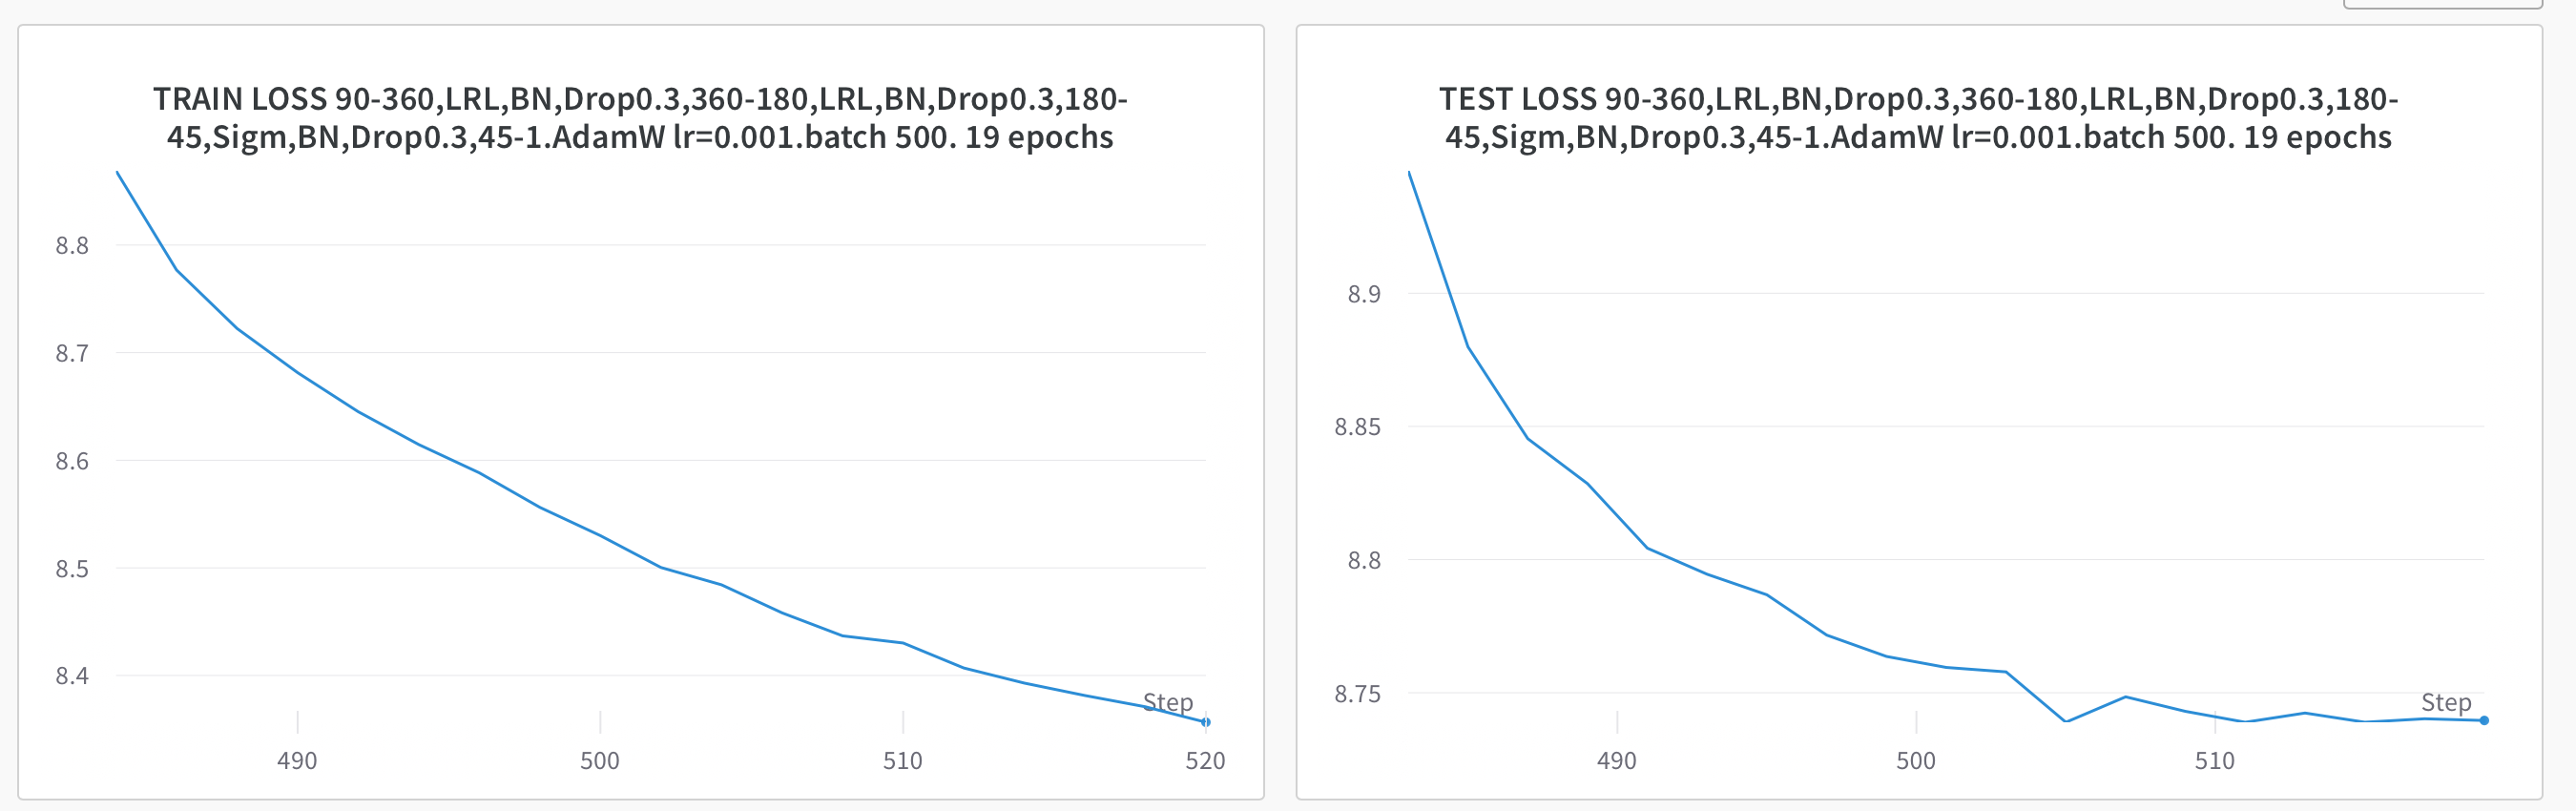

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

## WANDB лучший
Каждую модель я отслеживала в wandb, называя каждый график **полным описанием архитектуры** модели со всеми значениями гиперпараметров, чтобы потом быстро вспоминать какие параметры какой результат давали, а также чтобы удобнее отслеживать прогресс

####  Общий коммент насчет подбора эпох: почти все модели я тренировала на 10 эпохах и сравнивала их результаты и скорость на этих показателях, и если модель давала какие-то надежды по сравнению с другими, я смотрела, как она себя ведет на 20 эпохах

### I этап

1. Сначала я попробовала самую простую архитектуру из трех слоев: 90-45, 45-20, 20-1 (количество входных и выходных узлов), LeakyReLU и SGD с шагом 0.05. *Результаты были плохие* - за 20 эпох с бачом 64 и за 10 эпох с бачом 800 минимальный лосс был в районе **8.87** (спускался с 9-9.2)

Большой бач показывал лучшие результаты, так что на время я остановила эксперименты с его размером и сконцентрировалась на других гиперпараметрах и аспектах архитектуры.

2. Решила попробовать 4ый слой, и заставить модель искать больше зависимостей к концу: 90-45, 45-20, 20-10, 10-1; бач 800, оптимизатор SGD с шагом 0.05. Результат был получше, так что прогнала на 20 эпохах - получила лосс **8.819** - пока лучший результат, так что остаюсь на этой архитектуре и пробую улучшить качество засчет других изменений

3. Пробую разные функции активации и их комбинации: обычная ReLU, SoftMax, PReLU, LeakyReLU, Sigmoid и др. Совмещаю по несколько функций после одного и того же слоя, ставлю разные после разных слоев. SoftMax работает очень плохо в этой модели, лучше всего пока LeakyReLU. Резы пока около **8.6** за 10 эпох

4. Меняю оптимизатор с SGD на ADAM, пробую разные длины шагов. Слишком маленький шаг (0.0001) дает оч плохой рез, за 10 эпох **лосс не опустился ниже 9** (прошел с 10.116 до 9.008), шаг 0.0005 чуть получше - **8.854**, 0.001 - уже **8.823** - пока *лучший показатель за 10 эпох*.

Пытаюсь найти способы улучшить качество модели, не меняя основной архитектуры слоев - пробую другие гиперпараметры.

5. Снова экспериментирую с размером бача - беру 64, 128, 256, 500 (не спрашивай почему не 512, не знаю))). Результаты с первыми хуже на пару сотых, чем лучший рез so far. Перехожу на бач 500

6. Пробую с бач-нормализацией - за 10 эпох выбивается только **8.852**, дропаутом с разными коэффициентами p (0.1, 0.2, 0.3) - получаю **8.968 или 8.87**


### II этап

Качество не падает ниже 8.8, так что решаю поменять архитектуру модели и не сужать слои сразу, а сначала создать в несколько раз больше узлов, чем изначальных признаков, найти новые зависимости. 

1. Сделала трехслойную архитекутуру: 90-360, 360-60, 60-1. Она дала не такие хорошие результаты, как я бы хотела (**8.78 на 10й эпохе**), так что решила сделать чуть подробнее к концу
2. Добавила 4ый слой: 90-360, 360-180, 180-45, 45-1. С функцией активации PReLU (а также нормализацией бача и дропаутом) за 10 эпох минимальный результат был **8.786** на 4ой эпохе, но дальше лосс увеличивался и не держался стабильно. Прежде чем дальше бороться с переобучением, я попробовала вернуть LeakyReLU - результат стал лучше - лосс продолжал падать и за 10 эпох дошел до **8.77**
3. Пробую разные параметры дропаута и разные их комбинации после разных слоев, смотрю за ошибкой на тесте и на трейне. Лучше всего себя показывает p = 0.3 на трех первых слоях.
4. Запустила на 20 эпох - с 16ой эпохи **результат был <=8.75**, но колебался близко к границе, и к 20й эпохе ошибка начала увеличиваться:

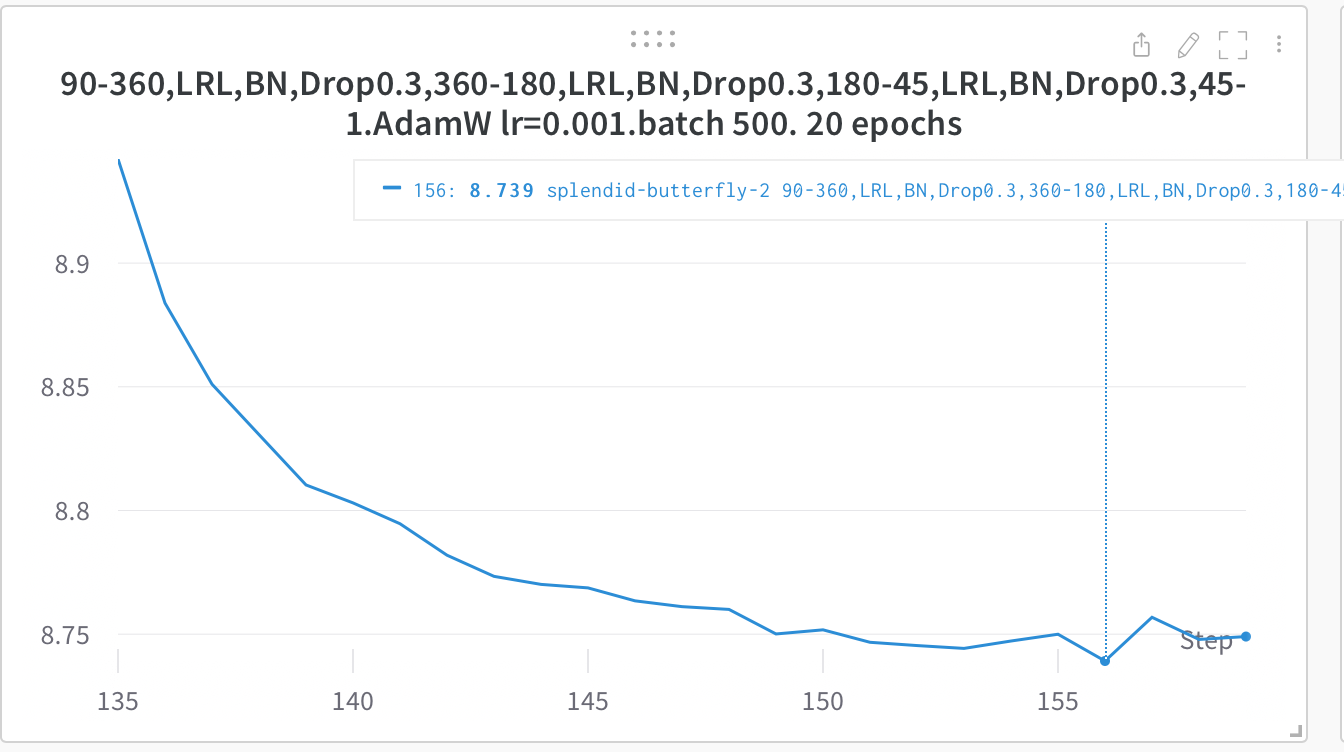

### III этап - отшлифовка финальной модели

Решила доработать модель чуть дальше.
Как еще один, дополнительный, способ борьбы c переобучением я решила попробовать weight_decay, и когда гуглила, нашла пост (https://www.fast.ai/posts/2018-07-02-adam-weight-decay.html), в котором говорится, что weight_decay в оптимизаторе Аdam реализован с ошибкой, и специально, чтобы пофиксить эту ошибку, был создан оптимизатор AdamW.

#### удивительно но факт
я прогнала одинаковую модель с оптимизатором Аdam с weight_decay=0.01 (дефолтный вес в AdamW) и с оптимизатором AdamW, и результат был сильно лучше на втором (в первом случае на 5ой эпохе лосс еще не перешел даже 9, тогда как на втором уже был **8.79**).

- остановилась на оптимизаторе AdamW с его дефолтным весом 0.01

1. Сновав пробую разные размеры бачей. на 128 лосс скачет вверх-вниз и не становится меньше 9, на 256 - не опускается менььше 8.8 за 10 эпох (что хуже предыдущих показателей), так что остасюсь с 500
2. Пока лосс чаще на верхней границе 8.75, минимум - 8.746. Продолжала перебирать разные функции активации и заметила, что очень хорошо работает на этой модели Сигмоида, если ее поставить в конец - лосс зайдет за 8.75 и спокойно остается там на протяжении нескольких эпох
3. Пробовала убирать бач нормализацию, но без нее конечно все работает хуже (без нее слева, с ней справа. в названии она BN)

## в итоге справа снизу модель, показавшая лучший результат - 8.739 на 15й эпохе

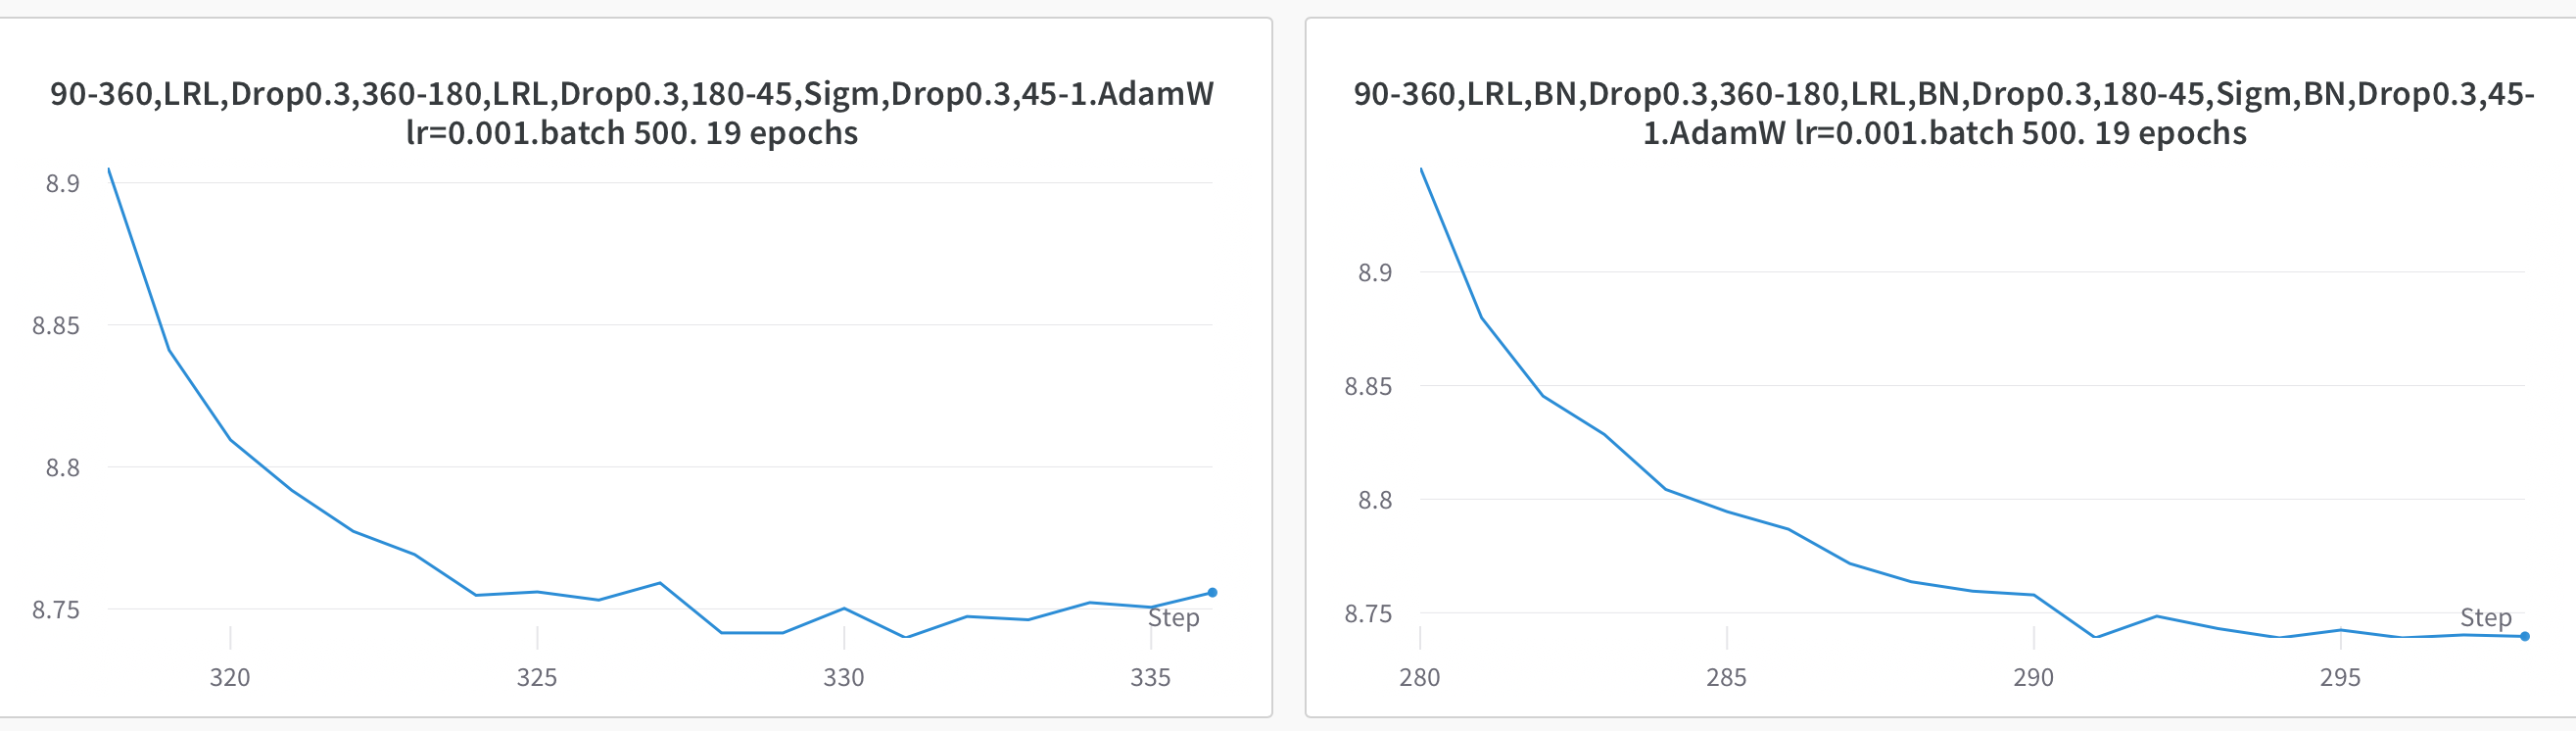